# **PyCaret**

- Pycaret is used in many parts of Machine Learning a but it is powerful and more efficient in classification.
- Pycaret is used in these cases:
    
    * Classification
    * Regression
    * Clustering
    * Anomaly Detection
    * Natural Language Processing
    * Association Rules Mining
    * Time Series
    
- Pycaret power by scikit-learn.

### for colab:
- from pycaret.utils import enable_colab
- enable_colab()

# 1. Binary Classification

In [1]:
from pycaret.datasets import get_data
dataset = get_data('credit')
#  profile = True  -->  for graphic profile

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,90000,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
2,50000,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
3,50000,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
4,50000,1,1,2,37,0,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0


In [2]:
dataset.shape

(24000, 24)

In [3]:
data = dataset.sample(frac=0.95, random_state=786)
data_unseen = dataset.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (22800, 24)
Unseen Data For Predictions: (1200, 24)


In [4]:
data

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,270000,2,1,2,34,0,0,2,0,0,...,44908.0,19508.0,15860.0,4025.0,5.0,34000.0,0.0,0.0,0.0,0
1,160000,2,1,2,42,-2,-2,-2,-2,-2,...,0.0,741.0,0.0,0.0,0.0,0.0,741.0,0.0,0.0,0
2,360000,2,1,2,30,0,0,0,0,0,...,146117.0,145884.0,147645.0,6000.0,6000.0,4818.0,5000.0,5000.0,4500.0,0
3,20000,2,1,2,25,0,0,0,0,0,...,18964.0,19676.0,20116.0,1700.0,1300.0,662.0,1000.0,747.0,602.0,0
4,70000,1,2,2,29,0,0,0,0,0,...,48538.0,49034.0,49689.0,2200.0,8808.0,2200.0,2000.0,2000.0,2300.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22795,130000,1,3,2,45,0,0,-1,0,-1,...,1261.0,390.0,390.0,1000.0,2522.0,0.0,390.0,390.0,390.0,0
22796,290000,2,1,2,29,0,0,0,0,-1,...,-77.0,8123.0,210989.0,1690.0,3000.0,0.0,8200.0,205000.0,6000.0,0
22797,210000,1,2,1,41,1,2,0,0,0,...,69670.0,59502.0,119494.0,0.0,5000.0,3600.0,2000.0,2000.0,5000.0,0
22798,550000,1,2,1,47,0,0,0,0,0,...,30000.0,0.0,0.0,10000.0,20000.0,5000.0,0.0,0.0,0.0,0


In [5]:
data_unseen

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,100000,2,2,2,23,0,-1,-1,0,0,...,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0
1,380000,1,2,2,32,-1,-1,-1,-1,-1,...,32018.0,11849.0,11873.0,21540.0,15138.0,24677.0,11851.0,11875.0,8251.0,0
2,200000,2,2,1,32,-1,-1,-1,-1,2,...,5247.0,3848.0,3151.0,5818.0,15.0,9102.0,17.0,3165.0,1395.0,0
3,200000,1,1,1,53,2,2,2,2,2,...,144098.0,147124.0,149531.0,6300.0,5500.0,5500.0,5500.0,5000.0,5000.0,1
4,240000,1,1,2,41,1,-1,-1,0,0,...,3164.0,360.0,1737.0,2622.0,3301.0,0.0,360.0,1737.0,924.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,50000,1,2,1,37,1,2,2,2,0,...,2846.0,1585.0,1324.0,0.0,3000.0,0.0,0.0,1000.0,1000.0,1
1196,220000,1,2,1,41,0,0,-1,-1,-2,...,5924.0,1759.0,1824.0,8840.0,6643.0,5924.0,1759.0,1824.0,7022.0,0
1197,420000,1,1,2,34,0,0,0,0,0,...,141695.0,144839.0,147954.0,7000.0,7000.0,5500.0,5500.0,5600.0,5000.0,0
1198,90000,1,2,1,36,0,0,0,0,0,...,11328.0,12036.0,14329.0,1500.0,1500.0,1500.0,1200.0,2500.0,0.0,1


In [6]:
import pycaret
from pycaret.classification import *

In [7]:
exp_clf102 = setup(data = data, target = 'default', session_id=123,
                  normalize = True, 
                  transformation = True, 
                  ignore_low_variance = True,
                  remove_multicollinearity = True, multicollinearity_threshold = 0.95,
                  bin_numeric_features = ['LIMIT_BAL', 'AGE'],
                  group_features = [['BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6'],
                                   ['PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']],
                  log_experiment = True, experiment_name = 'credit1',
                  fold_shuffle = True, use_gpu = True, fix_imbalance = True, imputation_type='iterative')

,Description,Value
0,session_id,123
1,Target,default
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(22800, 24)"
5,Missing Values,False
6,Numeric Features,14
7,Categorical Features,9
8,Ordinal Features,False
9,High Cardinality Features,False


AttributeError: 'Make_Time_Features' object has no attribute 'list_of_features'

In [8]:
best_model = compare_models()
top3 = compare_models(n_select = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8202,0.7724,0.3832,0.6513,0.4819,0.3820,0.4019,3.4020
gbc,Gradient Boosting Classifier,0.8192,0.7739,0.3826,0.6468,0.4804,0.3796,0.3990,17.8920
catboost,CatBoost Classifier,0.8180,0.7710,0.3783,0.6438,0.4760,0.3748,0.3945,19.6840
ada,Ada Boost Classifier,0.8165,0.7614,0.4035,0.6246,0.4900,0.3844,0.3982,4.4090
rf,Random Forest Classifier,0.8147,0.7570,0.3881,0.6240,0.4780,0.3727,0.3886,3.0300
et,Extra Trees Classifier,0.8125,0.7455,0.3821,0.6150,0.4708,0.3644,0.3799,4.2780
xgboost,Extreme Gradient Boosting,0.8122,0.7548,0.3760,0.6174,0.4664,0.3606,0.3775,1.0460
lda,Linear Discriminant Analysis,0.7715,0.7736,0.5916,0.4819,0.5309,0.3821,0.3857,0.5270
ridge,Ridge Classifier,0.7709,0.0000,0.5916,0.4807,0.5302,0.3809,0.3846,0.2460
lr,Logistic Regression,0.7301,0.7007,0.4996,0.4057,0.4474,0.2716,0.2743,0.4490


- AUC
    * AUC (Area under the ROC Curve). AUC provides an aggregate measure of performance across all possible classification thresholds. One way of interpreting AUC is as the probability that the model ranks a random positive example more highly than a random negative example.
    
- ROC
    * An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters: True Positive Rate. False Positive Rate.

- Accuracy
    * Accuracy is one metric for evaluating classification models. Informally, accuracy is the fraction of predictions our model got right. Formally, accuracy has the following definition: Accuracy = Number of correct predictions Total number of predictions.
    
- F1
    * It elegantly sums up the predictive performance of a model by combining two otherwise competing metrics — precision and recall.
    
- Kappa
    * In essence, the kappa statistic is a measure of how closely the instances classified by the machine learning classifier matched the data labeled as ground truth, controlling for the accuracy of a random classifier as measured by the expected accuracy.
    
- MCC 
    * The Matthews correlation coefficient (MCC), instead, is a more reliable statistical rate which produces a high score only if the prediction obtained good results in all of the four confusion matrix categories (true positives, false negatives, true negatives, and false positives), proportionally both to the size of positive elements and the size of negative elements in the dataset.
    
    

In [8]:
print(best_model)

NameError: name 'best_model' is not defined

In [9]:
print(top3)

NameError: name 'top3' is not defined

In [8]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,pycaret.internal.tunable.TunableMLPClassifier,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


#### Logistic Regression

In [9]:
lr = create_model('lr')
# fold = num    (default = 10)
# round = num   (decimal)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7406,0.7319,0.5072,0.4224,0.4609,0.2920,0.2941
1,0.7356,0.7233,0.5244,0.4169,0.4645,0.2920,0.2953
2,0.7274,0.6912,0.4499,0.3925,0.4192,0.2422,0.2432
3,0.7318,0.6927,0.4699,0.4029,0.4339,0.2595,0.2608
4,0.7500,0.7082,0.5014,0.4375,0.4673,0.3050,0.3062
5,0.7362,0.6932,0.4957,0.4139,0.4511,0.2793,0.2813
6,0.6999,0.6689,0.5043,0.3651,0.4236,0.2277,0.2331
7,0.7143,0.6948,0.5158,0.3854,0.4412,0.2546,0.2595
8,0.7249,0.6881,0.5100,0.3991,0.4478,0.2683,0.2718
9,0.7398,0.7144,0.5172,0.4215,0.4645,0.2950,0.2977


##### tune model

In [10]:
tuned_lr = tune_model(lr, optimize = 'Recall')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7406,0.7319,0.5072,0.4224,0.4609,0.2920,0.2941
1,0.7356,0.7233,0.5244,0.4169,0.4645,0.2920,0.2953
2,0.7274,0.6912,0.4499,0.3925,0.4192,0.2422,0.2432
3,0.7318,0.6927,0.4699,0.4029,0.4339,0.2595,0.2608
4,0.7500,0.7082,0.5014,0.4375,0.4673,0.3050,0.3062
5,0.7362,0.6932,0.4957,0.4139,0.4511,0.2793,0.2813
6,0.5533,0.6989,0.7708,0.2982,0.4301,0.1676,0.2194
7,0.7143,0.6948,0.5158,0.3854,0.4412,0.2546,0.2595
8,0.7249,0.6881,0.5100,0.3991,0.4478,0.2683,0.2718
9,0.7398,0.7144,0.5172,0.4215,0.4645,0.2950,0.2977


In [11]:
tuned_lr2 = tune_model(lr, optimize = 'Precision')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7406,0.7319,0.5072,0.4224,0.4609,0.2920,0.2941
1,0.7356,0.7233,0.5244,0.4169,0.4645,0.2920,0.2953
2,0.7274,0.6912,0.4499,0.3925,0.4192,0.2422,0.2432
3,0.7318,0.6927,0.4699,0.4029,0.4339,0.2595,0.2608
4,0.7500,0.7082,0.5014,0.4375,0.4673,0.3050,0.3062
5,0.7362,0.6932,0.4957,0.4139,0.4511,0.2793,0.2813
6,0.6999,0.6689,0.5043,0.3651,0.4236,0.2277,0.2331
7,0.7143,0.6948,0.5158,0.3854,0.4412,0.2546,0.2595
8,0.7249,0.6881,0.5100,0.3991,0.4478,0.2683,0.2718
9,0.7398,0.7144,0.5172,0.4215,0.4645,0.2950,0.2977


In [12]:
plot_model(tuned_lr, plot = 'parameter')

,Parameters
C,0.024
class_weight,balanced
dual,False
fit_intercept,True
intercept_scaling,1
l1_ratio,None
max_iter,1000
multi_class,auto
n_jobs,None
penalty,l2


In [13]:
plot_model(tuned_lr2, plot = 'parameter')

,Parameters
C,5.56
class_weight,balanced
dual,False
fit_intercept,True
intercept_scaling,1
l1_ratio,None
max_iter,1000
multi_class,auto
n_jobs,None
penalty,none


##### 2. Plot

##### 2.1 AUC Plot

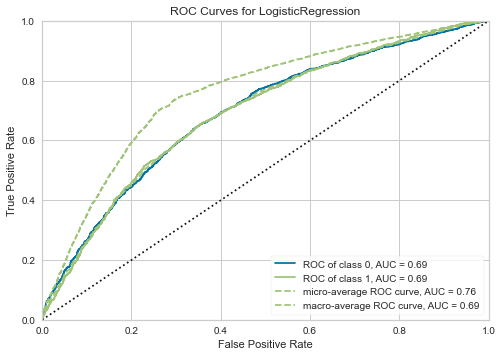

In [14]:
plot_model(tuned_lr, plot = 'auc')

##### 2.2 Precision-Recall Curve

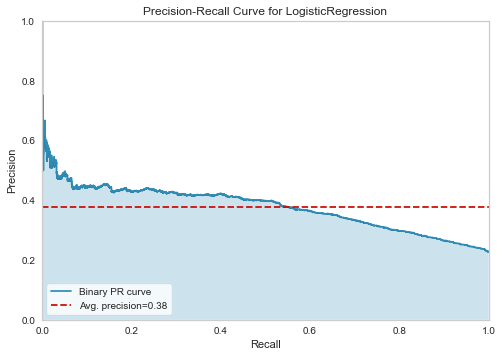

In [15]:
plot_model(tuned_lr, plot = 'pr')

##### 2.3 Feature Importance Plot

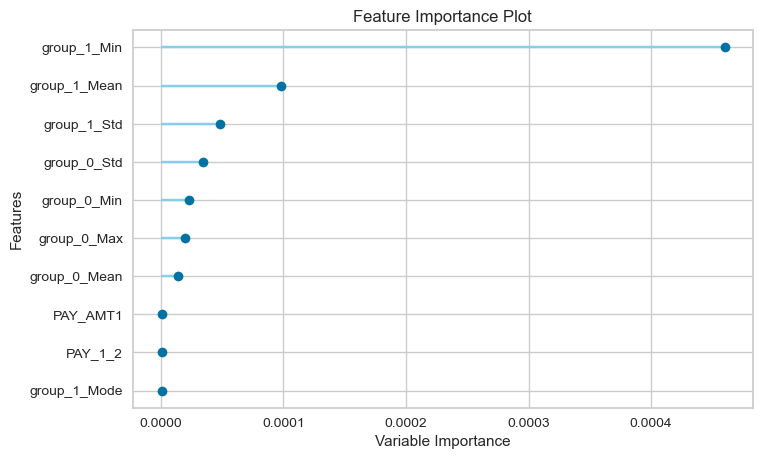

In [16]:
plot_model(tuned_lr, plot='feature')

##### 2.4 Confusion Matrix

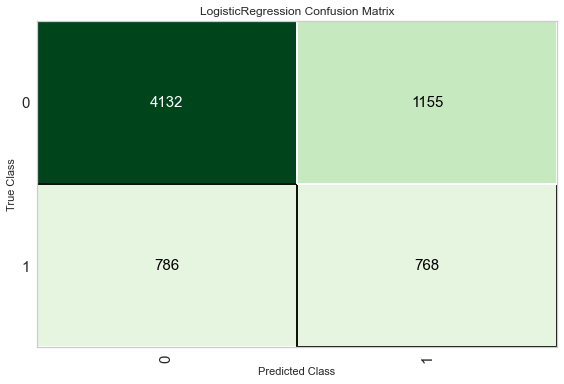

In [17]:
plot_model(tuned_lr, plot = 'confusion_matrix')
# plot_kwargs = {'percent' : True}

In [27]:
evaluate_model(tuned_lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

##### 3. Predict on test Sample

In [74]:
predict_model(tuned_lr);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.7163,0.6907,0.4942,0.3994,0.4418,0.2544,0.2570


##### 4. Finalize Model for Deployment

In [82]:
final_lr = finalize_model(tuned_lr)

In [85]:
predict_model(final_lr);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.7221,0.6923,0.4813,0.4059,0.4404,0.2573,0.2590


##### 5. Predict on unseen data

In [83]:
unseen_predictions = predict_model(final_lr, data=data_unseen)
unseen_predictions.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,Label,Score
0,100000,2,2,2,23,0,-1,-1,0,0,...,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0,0,0.5253
1,380000,1,2,2,32,-1,-1,-1,-1,-1,...,11873.0,21540.0,15138.0,24677.0,11851.0,11875.0,8251.0,0,0,0.9906
2,200000,2,2,1,32,-1,-1,-1,-1,2,...,3151.0,5818.0,15.0,9102.0,17.0,3165.0,1395.0,0,0,0.5470
3,200000,1,1,1,53,2,2,2,2,2,...,149531.0,6300.0,5500.0,5500.0,5500.0,5000.0,5000.0,1,0,0.6460
4,240000,1,1,2,41,1,-1,-1,0,0,...,1737.0,2622.0,3301.0,0.0,360.0,1737.0,924.0,0,0,0.5211


#### K Neighbors Classifier

In [15]:
knn = create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6241,0.6314,0.5358,0.2992,0.3840,0.1437,0.1563
1,0.6071,0.6269,0.5501,0.2900,0.3798,0.1310,0.1453
2,0.6241,0.6124,0.5301,0.2979,0.3814,0.1409,0.1530
3,0.6234,0.6059,0.4986,0.2900,0.3667,0.1247,0.1339
4,0.6203,0.6171,0.5272,0.2944,0.3778,0.1351,0.1470
5,0.6222,0.6149,0.5501,0.3009,0.3891,0.1483,0.1624
6,0.6172,0.6329,0.5616,0.2997,0.3908,0.1478,0.1633
7,0.6084,0.5991,0.4986,0.2788,0.3577,0.1073,0.1166
8,0.6103,0.6134,0.5215,0.2857,0.3692,0.1207,0.1322
9,0.6169,0.6231,0.5690,0.3005,0.3932,0.1507,0.1671


##### tune model

In [28]:
tuned_knn = tune_model(knn, optimize = 'Recall')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5783,0.6454,0.6246,0.2868,0.3931,0.1334,0.1572
1,0.5921,0.6641,0.6418,0.2987,0.4076,0.1556,0.1822
2,0.6084,0.6705,0.6648,0.3135,0.4261,0.1834,0.2133
3,0.5965,0.6551,0.6218,0.2977,0.4026,0.1517,0.1752
4,0.6071,0.6735,0.6562,0.3111,0.4221,0.1784,0.2070
5,0.6134,0.6673,0.6590,0.3159,0.4271,0.1867,0.2155
6,0.5758,0.6666,0.6562,0.2913,0.4035,0.1444,0.1732
7,0.5890,0.6571,0.6361,0.2956,0.4036,0.1498,0.1755
8,0.5996,0.6727,0.6418,0.3035,0.4121,0.1639,0.1904
9,0.5818,0.6654,0.6494,0.2931,0.4039,0.1477,0.1755


In [29]:
tuned_knn2 = tune_model(knn, optimize = 'Precision')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6378,0.6503,0.5616,0.3156,0.4041,0.1724,0.1872
1,0.6378,0.6579,0.5903,0.3214,0.4162,0.1855,0.2036
2,0.6435,0.6516,0.5215,0.3116,0.3901,0.1603,0.1709
3,0.6454,0.6402,0.5215,0.3133,0.3914,0.1626,0.1731
4,0.6472,0.6575,0.5702,0.3252,0.4142,0.1880,0.2032
5,0.6397,0.6425,0.5731,0.3195,0.4103,0.1800,0.1959
6,0.6410,0.6614,0.5960,0.3250,0.4206,0.1919,0.2105
7,0.6247,0.6409,0.5244,0.2971,0.3793,0.1389,0.1504
8,0.6410,0.6438,0.5215,0.3095,0.3885,0.1572,0.1679
9,0.6395,0.6605,0.5718,0.3184,0.4090,0.1789,0.1948


In [30]:
plot_model(tuned_knn, plot = 'parameter')

,Parameters
algorithm,auto
leaf_size,30
metric,minkowski
metric_params,None
n_jobs,-1
n_neighbors,49
p,2
weights,uniform


In [31]:
plot_model(tuned_knn2, plot = 'parameter')

,Parameters
algorithm,auto
leaf_size,30
metric,manhattan
metric_params,None
n_jobs,-1
n_neighbors,16
p,2
weights,uniform


##### 2. Plot

##### 2.1 AUC Plot

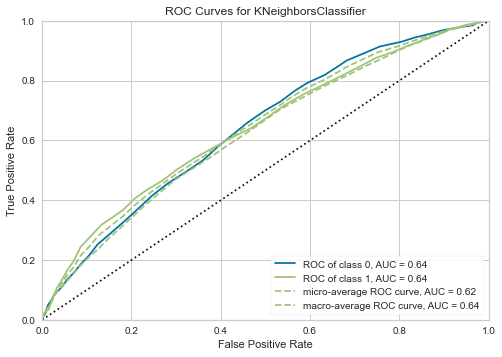

In [56]:
plot_model(tuned_knn, plot = 'auc')

##### 2.2 Precision-Recall Curve

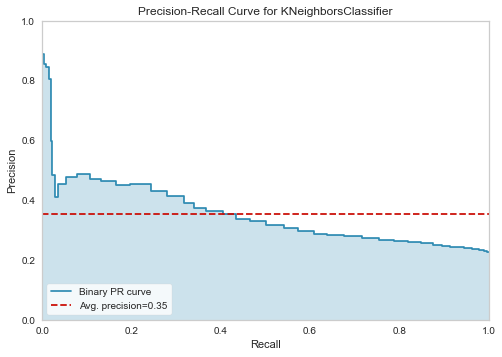

In [57]:
plot_model(tuned_knn, plot = 'pr')

##### 2.3 Feature Importance Plot

In [86]:
# This model doesn't support this plot
# plot_model(tuned_knn, plot='feature')

##### 2.4 Confusion Matrix

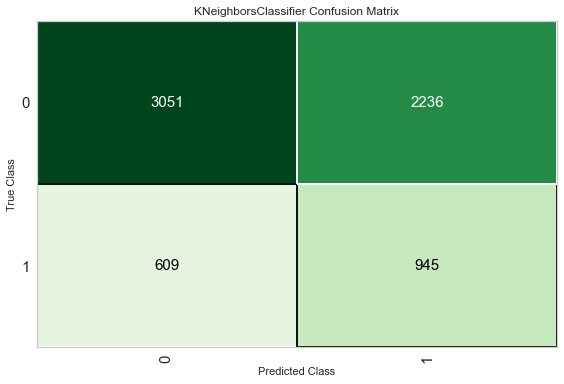

In [60]:
plot_model(tuned_knn, plot = 'confusion_matrix')

##### 3. Predict on test Sample

In [78]:
predict_model(tuned_knn);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0.5841,0.6417,0.6081,0.2971,0.3992,0.1352,0.1556


##### 4. Finalize Model for Deployment

In [81]:
final_knn = finalize_model(tuned_knn)

In [87]:
predict_model(final_knn);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0.6283,0.7283,0.7291,0.3481,0.4712,0.2364,0.2750


##### 5. Predict on unseen data

In [88]:
unseen_predictions = predict_model(final_knn, data=data_unseen)
unseen_predictions.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,Label,Score
0,100000,2,2,2,23,0,-1,-1,0,0,...,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0,0,0.6531
1,380000,1,2,2,32,-1,-1,-1,-1,-1,...,11873.0,21540.0,15138.0,24677.0,11851.0,11875.0,8251.0,0,0,0.9592
2,200000,2,2,1,32,-1,-1,-1,-1,2,...,3151.0,5818.0,15.0,9102.0,17.0,3165.0,1395.0,0,0,0.6735
3,200000,1,1,1,53,2,2,2,2,2,...,149531.0,6300.0,5500.0,5500.0,5500.0,5000.0,5000.0,1,0,0.5102
4,240000,1,1,2,41,1,-1,-1,0,0,...,1737.0,2622.0,3301.0,0.0,360.0,1737.0,924.0,0,0,0.6531


#### SVM - Linear Kernel

In [16]:
svm = create_model('svm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6516,0.0000,0.2521,0.2298,0.2404,0.0151,0.0151
1,0.7650,0.0000,0.0315,0.2292,0.0554,0.0027,0.0045
2,0.7619,0.0000,0.0458,0.2540,0.0777,0.0116,0.0173
3,0.7569,0.0000,0.4069,0.4396,0.4226,0.2689,0.2693
4,0.5445,0.0000,0.6991,0.2818,0.4016,0.1307,0.1662
5,0.7675,0.0000,0.0602,0.3281,0.1017,0.0364,0.0541
6,0.7494,0.0000,0.4384,0.4286,0.4334,0.2726,0.2726
7,0.7337,0.0000,0.4900,0.4091,0.4459,0.2725,0.2744
8,0.7732,0.0000,0.3954,0.4775,0.4326,0.2924,0.2945
9,0.4056,0.0000,0.8678,0.2508,0.3892,0.0766,0.1387


##### tune model

In [32]:
tuned_svm = tune_model(svm, optimize = 'Recall')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.4442,0.0000,0.9370,0.2743,0.4244,0.1301,0.2313
1,0.4850,0.0000,0.8252,0.2745,0.4120,0.1248,0.1872
2,0.4812,0.0000,0.8252,0.2730,0.4103,0.1216,0.1835
3,0.4568,0.0000,0.8510,0.2671,0.4066,0.1105,0.1775
4,0.5100,0.0000,0.8023,0.2820,0.4173,0.1385,0.1965
5,0.4806,0.0000,0.8052,0.2697,0.4040,0.1136,0.1692
6,0.4524,0.0000,0.8539,0.2658,0.4054,0.1079,0.1753
7,0.4956,0.0000,0.8338,0.2803,0.4196,0.1372,0.2035
8,0.3904,0.0000,0.9169,0.2532,0.3968,0.0822,0.1628
9,0.4928,0.0000,0.8103,0.2751,0.4108,0.1261,0.1849


In [33]:
tuned_svm2 = tune_model(svm, optimize = 'Precision')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7694,0.0000,0.0372,0.2889,0.0660,0.0169,0.0289
1,0.7657,0.0000,0.0315,0.2340,0.0556,0.0038,0.0065
2,0.7588,0.0000,0.3840,0.4408,0.4104,0.2597,0.2607
3,0.5764,0.0000,0.6418,0.2890,0.3986,0.1389,0.1654
4,0.7600,0.0000,0.4413,0.4503,0.4457,0.2926,0.2926
5,0.6573,0.0000,0.6132,0.3419,0.4390,0.2199,0.2394
6,0.5107,0.0000,0.7221,0.2692,0.3922,0.1081,0.1457
7,0.7043,0.0000,0.5387,0.3768,0.4434,0.2505,0.2579
8,0.6053,0.0000,0.6304,0.3051,0.4112,0.1652,0.1899
9,0.6884,0.0000,0.5345,0.3570,0.4281,0.2254,0.2341


In [34]:
plot_model(tuned_svm, plot = 'parameter')

,Parameters
alpha,1e-07
average,False
class_weight,None
early_stopping,False
epsilon,0.1
eta0,0.5
fit_intercept,True
l1_ratio,0.7700000001
learning_rate,adaptive
loss,hinge


In [35]:
plot_model(tuned_svm2, plot = 'parameter')

,Parameters
alpha,0.002
average,False
class_weight,None
early_stopping,False
epsilon,0.1
eta0,0.3
fit_intercept,False
l1_ratio,0.6000000001
learning_rate,optimal
loss,hinge


##### 2. Plot

##### 2.1 AUC Plot

In [63]:
# AUC plot not available for estimators with no predict_proba attribute
# plot_model(tuned_svm, plot = 'auc')

##### 2.2 Precision-Recall Curve

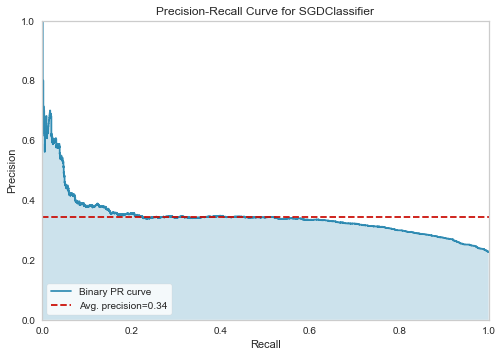

In [64]:
plot_model(tuned_svm, plot = 'pr')

##### 2.3 Feature Importance Plot

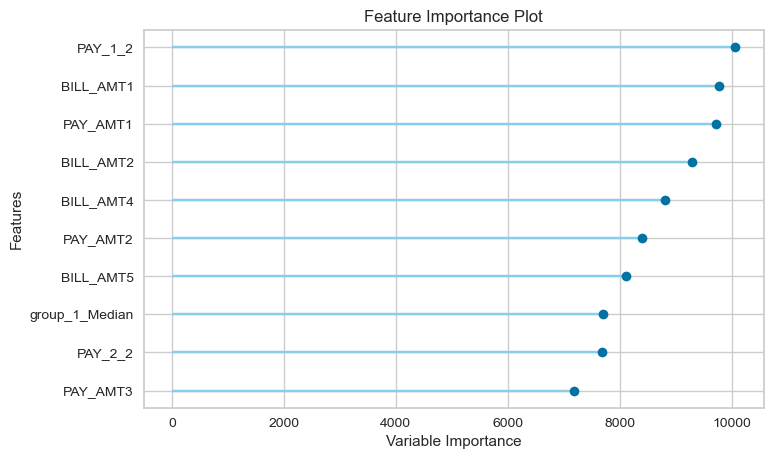

In [65]:
plot_model(tuned_svm, plot='feature')

##### 2.4 Confusion Matrix

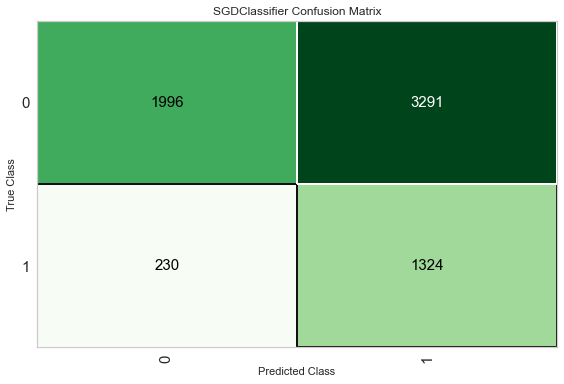

In [66]:
plot_model(tuned_svm, plot = 'confusion_matrix')

##### 3. Predict on test Sample

In [89]:
predict_model(tuned_svm);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.4853,0.6148,0.8520,0.2869,0.4292,0.1354,0.2053


##### 4. Finalize Model for Deployment

In [90]:
final_svm = finalize_model(tuned_svm)

In [91]:
predict_model(final_svm);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.5012,0.6039,0.7921,0.2850,0.4191,0.1277,0.1806


##### 5. Predict on unseen data

In [92]:
unseen_predictions = predict_model(final_svm, data=data_unseen)
unseen_predictions.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,Label
0,100000,2,2,2,23,0,-1,-1,0,0,...,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0,1
1,380000,1,2,2,32,-1,-1,-1,-1,-1,...,11849.0,11873.0,21540.0,15138.0,24677.0,11851.0,11875.0,8251.0,0,0
2,200000,2,2,1,32,-1,-1,-1,-1,2,...,3848.0,3151.0,5818.0,15.0,9102.0,17.0,3165.0,1395.0,0,1
3,200000,1,1,1,53,2,2,2,2,2,...,147124.0,149531.0,6300.0,5500.0,5500.0,5500.0,5000.0,5000.0,1,0
4,240000,1,1,2,41,1,-1,-1,0,0,...,360.0,1737.0,2622.0,3301.0,0.0,360.0,1737.0,924.0,0,1


#### Light Gradient Boosting Machine	

In [17]:
lightgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8289,0.8015,0.4155,0.6776,0.5151,0.4184,0.4369
1,0.8258,0.7762,0.4069,0.6667,0.5053,0.4071,0.4253
2,0.8095,0.7521,0.3410,0.6166,0.4391,0.3357,0.3570
3,0.8233,0.7873,0.3868,0.6650,0.4891,0.3912,0.4122
4,0.8227,0.7794,0.3668,0.6737,0.4750,0.3793,0.4047
5,0.8170,0.7474,0.3553,0.6492,0.4593,0.3603,0.3840
6,0.8083,0.7710,0.4040,0.5900,0.4796,0.3671,0.3770
7,0.8289,0.7694,0.4269,0.6712,0.5219,0.4239,0.4400
8,0.8133,0.7684,0.3553,0.6294,0.4542,0.3520,0.3729
9,0.8245,0.7710,0.3736,0.6771,0.4815,0.3863,0.4110


##### 1. Plot

##### 1.1 AUC Plot

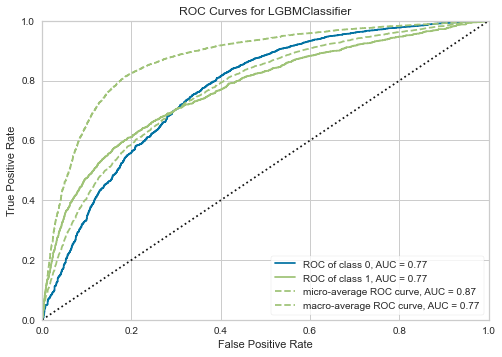

In [68]:
plot_model(lightgbm, plot = 'auc')

##### 1.2 Precision-Recall Curve

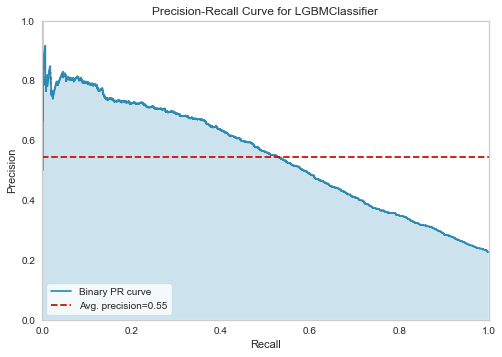

In [69]:
plot_model(lightgbm, plot = 'pr')

##### 1.3 Feature Importance Plot

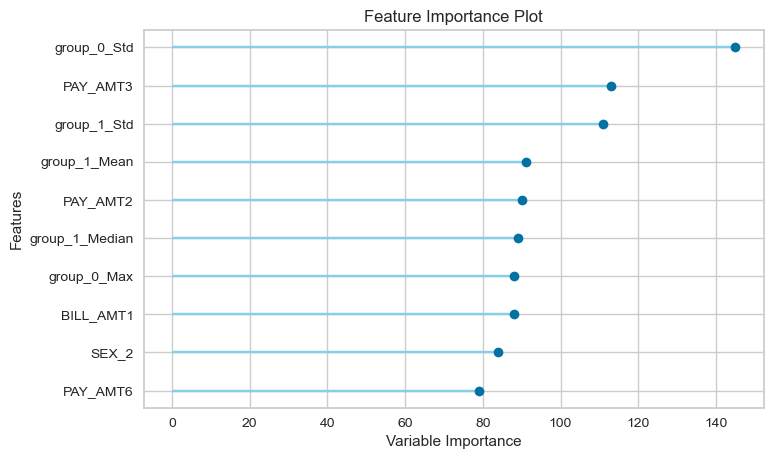

In [70]:
plot_model(lightgbm, plot='feature')

##### 1.4 Confusion Matrix

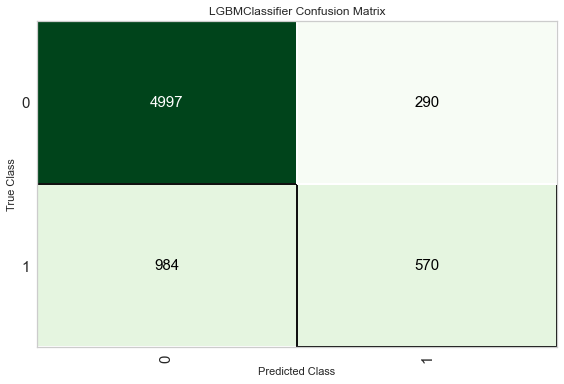

In [71]:
plot_model(lightgbm, plot = 'confusion_matrix')

##### 2. Predict on test Sample

In [93]:
predict_model(lightgbm);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.8138,0.7705,0.3668,0.6628,0.4722,0.3703,0.3942


##### 3. Finalize Model for Deployment

In [94]:
final_lightgbm = finalize_model(lightgbm)

In [95]:
predict_model(final_lightgbm);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.8332,0.8705,0.4189,0.7323,0.5330,0.4404,0.4659


##### 4. Predict on unseen data

In [96]:
unseen_predictions = predict_model(final_lightgbm, data=data_unseen)
unseen_predictions.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,Label,Score
0,100000,2,2,2,23,0,-1,-1,0,0,...,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0,0,0.8653
1,380000,1,2,2,32,-1,-1,-1,-1,-1,...,11873.0,21540.0,15138.0,24677.0,11851.0,11875.0,8251.0,0,0,0.9782
2,200000,2,2,1,32,-1,-1,-1,-1,2,...,3151.0,5818.0,15.0,9102.0,17.0,3165.0,1395.0,0,0,0.8700
3,200000,1,1,1,53,2,2,2,2,2,...,149531.0,6300.0,5500.0,5500.0,5500.0,5000.0,5000.0,1,1,0.8345
4,240000,1,1,2,41,1,-1,-1,0,0,...,1737.0,2622.0,3301.0,0.0,360.0,1737.0,924.0,0,0,0.6681


##### 5. Saving the model

In [ ]:
save_model(final_lightgbm,'Final lightgbm Model')

##### 6.Loading the saved model

In [ ]:
saved_final_lightgbm = load_model('Final lightgbm Model')

In [ ]:
new_prediction = predict_model(saved_final_lightgbm, data=data_unseen)

In [ ]:
new_prediction.head()

### decision tree 

In [28]:
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7262,0.6113,0.3983,0.3798,0.3888,0.2125,0.2126
1,0.7218,0.6209,0.4413,0.3821,0.4096,0.2288,0.2298
2,0.7231,0.6084,0.4069,0.3767,0.3912,0.2123,0.2126
3,0.7306,0.6141,0.4011,0.3878,0.3944,0.2212,0.2212
4,0.7387,0.6137,0.3868,0.3994,0.3930,0.2266,0.2266
5,0.7237,0.6084,0.4011,0.3763,0.3883,0.2101,0.2103
6,0.7124,0.6127,0.4298,0.3659,0.3953,0.2082,0.2094
7,0.7293,0.6260,0.4441,0.3944,0.4178,0.2423,0.2430
8,0.7231,0.6063,0.3983,0.3747,0.3861,0.2075,0.2077
9,0.7335,0.6305,0.4425,0.4000,0.4202,0.2478,0.2483


In [29]:
tuned_dt = tune_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8227,0.6317,0.2923,0.7391,0.4189,0.3367,0.3874
1,0.8214,0.6330,0.2980,0.7222,0.4219,0.3372,0.3836
2,0.8164,0.6205,0.2722,0.7090,0.3934,0.3096,0.3591
3,0.8221,0.6395,0.3152,0.7097,0.4365,0.3489,0.3896
4,0.8177,0.6223,0.2751,0.7164,0.3975,0.3143,0.3646
5,0.8183,0.6186,0.2636,0.7360,0.3882,0.3084,0.3648
6,0.8083,0.6235,0.2951,0.6319,0.4023,0.3057,0.3372
7,0.8152,0.6300,0.3009,0.6731,0.4158,0.3246,0.3618
8,0.8145,0.6213,0.2779,0.6879,0.3959,0.3090,0.3534
9,0.8188,0.6241,0.2787,0.7185,0.4017,0.3185,0.3684


In [30]:
evaluate_model(tuned_dt)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

#### 1. Ensemble Model (Mostly tree based. For example, Decision Tree Classifier)

In [38]:
# Create a Decision Tree Classifier:
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7262,0.6113,0.3983,0.3798,0.3888,0.2125,0.2126
1,0.7218,0.6209,0.4413,0.3821,0.4096,0.2288,0.2298
2,0.7231,0.6084,0.4069,0.3767,0.3912,0.2123,0.2126
3,0.7306,0.6141,0.4011,0.3878,0.3944,0.2212,0.2212
4,0.7387,0.6137,0.3868,0.3994,0.3930,0.2266,0.2266
5,0.7237,0.6084,0.4011,0.3763,0.3883,0.2101,0.2103
6,0.7124,0.6127,0.4298,0.3659,0.3953,0.2082,0.2094
7,0.7293,0.6260,0.4441,0.3944,0.4178,0.2423,0.2430
8,0.7231,0.6063,0.3983,0.3747,0.3861,0.2075,0.2077
9,0.7335,0.6305,0.4425,0.4000,0.4202,0.2478,0.2483


##### 1.1 Bagging

In [39]:
#  If method was not defined, default is Bagging
bagged_dt = ensemble_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8102,0.7536,0.3811,0.6045,0.4675,0.3591,0.3733
1,0.8026,0.7136,0.3438,0.5825,0.4324,0.3224,0.3389
2,0.7838,0.7133,0.2837,0.5103,0.3646,0.2470,0.2625
3,0.8089,0.7366,0.3352,0.6158,0.4341,0.3310,0.3532
4,0.8127,0.7102,0.3209,0.6437,0.4283,0.3309,0.3597
5,0.8045,0.7031,0.3009,0.6069,0.4023,0.3010,0.3275
6,0.8020,0.7263,0.3725,0.5727,0.4514,0.3371,0.3488
7,0.7932,0.7147,0.3582,0.5411,0.4310,0.3110,0.3209
8,0.8039,0.7074,0.3324,0.5918,0.4257,0.3185,0.3378
9,0.8069,0.7222,0.3218,0.6087,0.4211,0.3181,0.3414


##### 1.2 Boosting

In [40]:
boosted_dt = ensemble_model(dt, method = 'Boosting')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7932,0.6672,0.2923,0.5514,0.3820,0.2717,0.2914
1,0.6967,0.6464,0.4670,0.3536,0.4025,0.2045,0.2080
2,0.7581,0.6945,0.4126,0.4431,0.4273,0.2742,0.2745
3,0.7782,0.6507,0.3324,0.4895,0.3959,0.2661,0.2736
4,0.7870,0.7102,0.3352,0.5200,0.4077,0.2851,0.2953
5,0.6698,0.6331,0.4957,0.3302,0.3963,0.1815,0.1886
6,0.6949,0.6540,0.5100,0.3603,0.4223,0.2232,0.2294
7,0.7469,0.6982,0.4527,0.4259,0.4389,0.2757,0.2759
8,0.7744,0.6498,0.3467,0.4783,0.4020,0.2673,0.2726
9,0.7793,0.6881,0.3764,0.4925,0.4267,0.2931,0.2971


##### 1.3 Blending

In [41]:
blend_soft = blend_models(estimator_list = [lightgbm, dt, lr])

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7569,0.7634,0.4097,0.4400,0.4243,0.2705,0.2708
1,0.7431,0.7551,0.4470,0.4182,0.4321,0.2664,0.2666
2,0.7487,0.7346,0.4097,0.4231,0.4163,0.2563,0.2563
3,0.7556,0.7474,0.4097,0.4373,0.4231,0.2683,0.2685
4,0.7581,0.7418,0.3954,0.4409,0.4169,0.2649,0.2655
5,0.7506,0.7224,0.4097,0.4269,0.4181,0.2595,0.2596
6,0.7331,0.7259,0.4355,0.3990,0.4164,0.2438,0.2442
7,0.7519,0.7422,0.4441,0.4342,0.4391,0.2798,0.2799
8,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
9,0.7655,0.7481,0.4540,0.4620,0.4580,0.3084,0.3084


In [42]:
blender_top3 = blend_models(top3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8283,0.8079,0.4040,0.6812,0.5072,0.4113,0.4319
1,0.8001,0.7687,0.4699,0.5503,0.5070,0.3826,0.3845
2,0.8108,0.7608,0.3553,0.6169,0.4509,0.3465,0.3657
3,0.8289,0.7914,0.3954,0.6900,0.5027,0.4085,0.4316
4,0.8227,0.7856,0.3668,0.6737,0.4750,0.3793,0.4047
5,0.8195,0.7507,0.3553,0.6631,0.4627,0.3659,0.3917
6,0.8089,0.7711,0.4069,0.5917,0.4822,0.3699,0.3796
7,0.8271,0.7771,0.4155,0.6682,0.5124,0.4141,0.4314
8,0.8164,0.7719,0.3582,0.6443,0.4604,0.3605,0.3831
9,0.8219,0.7726,0.3649,0.6684,0.4721,0.3759,0.4009


##### 1.4 Stacking

In [ ]:
stack_soft = stack_models(top3)

In [ ]:
xgboost = create_model('xgboost')
stack_soft2 = stack_models(top3, meta_model=xgboost)

In [44]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8202,0.7862,0.3811,0.6520,0.4810,0.3812,0.4013
1,0.8189,0.7578,0.3897,0.6415,0.4848,0.3829,0.4004
2,0.8033,0.7431,0.3668,0.5792,0.4491,0.3366,0.3497
3,0.8221,0.7702,0.3897,0.6570,0.4892,0.3899,0.4094
4,0.8183,0.7490,0.3840,0.6411,0.4803,0.3785,0.3968
5,0.8164,0.7282,0.3696,0.6386,0.4682,0.3667,0.3867
6,0.8058,0.7501,0.4183,0.5771,0.4850,0.3691,0.3763
7,0.8120,0.7607,0.4126,0.6025,0.4898,0.3795,0.3897
8,0.8064,0.7525,0.3725,0.5909,0.4569,0.3464,0.3601
9,0.8238,0.7726,0.3966,0.6603,0.4955,0.3967,0.4157


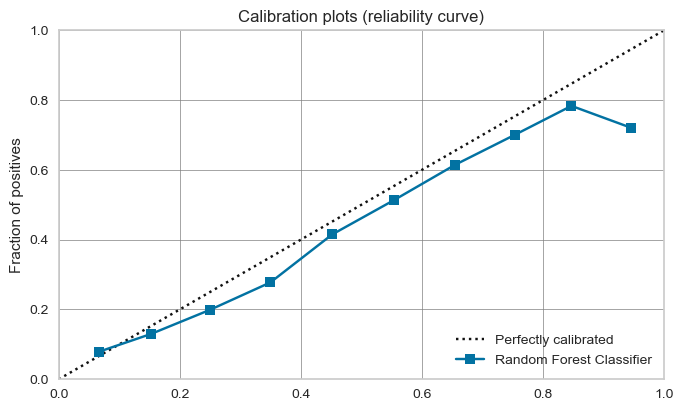

In [45]:
plot_model(rf, plot='calibration')

In [46]:
calibrated_rf = calibrate_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8289,0.7922,0.4499,0.6597,0.5349,0.4347,0.4466
1,0.8083,0.7663,0.4212,0.5857,0.4900,0.3758,0.3835
2,0.8008,0.7562,0.4011,0.5622,0.4682,0.3498,0.3574
3,0.8239,0.7692,0.4384,0.6429,0.5213,0.4181,0.4296
4,0.8170,0.7498,0.4212,0.6203,0.5017,0.3946,0.4057
5,0.8133,0.7303,0.3868,0.6164,0.4754,0.3689,0.3838
6,0.8008,0.7657,0.4670,0.5525,0.5062,0.3825,0.3846
7,0.8095,0.7654,0.4556,0.5824,0.5113,0.3952,0.3997
8,0.8076,0.7536,0.4069,0.5868,0.4805,0.3672,0.3765
9,0.8263,0.7758,0.4425,0.6498,0.5265,0.4248,0.4366


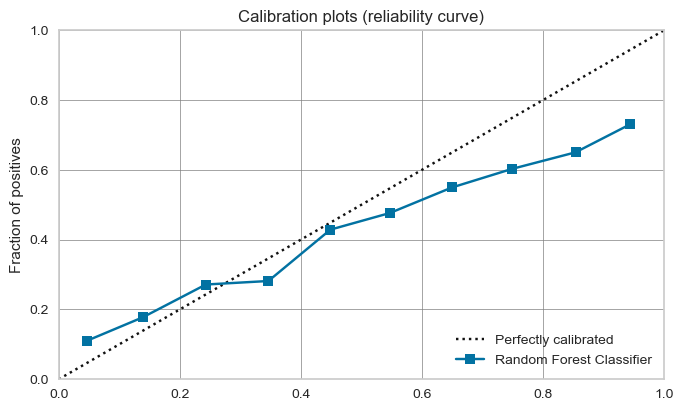

In [47]:
plot_model(calibrated_rf, plot='calibration')

# 2. Multiclass Classification

In [27]:
dataset2 = get_data('iris')

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [28]:
dataset2.shape

(150, 5)

In [29]:
data2 = dataset2.sample(frac=0.9, random_state=786)
data_unseen2 = dataset2.drop(data2.index)

data2.reset_index(drop=True, inplace=True)
data_unseen2.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data2.shape))
print('Unseen Data For Predictions: ' + str(data_unseen2.shape))

Data for Modeling: (135, 5)
Unseen Data For Predictions: (15, 5)


In [30]:
exp_mclf103 = setup(data = data2, target = 'species', session_id=123,
                   fold_shuffle = True, use_gpu = True, fix_imbalance = True, imputation_type='iterative') 

,Description,Value
0,session_id,123
1,Target,species
2,Target Type,Multiclass
3,Label Encoded,"Iris-setosa: 0, Iris-versicolor: 1, Iris-virginica: 2"
4,Original Data,"(135, 5)"
5,Missing Values,False
6,Numeric Features,4
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 0


AttributeError: 'Make_Time_Features' object has no attribute 'list_of_features'

In [35]:
best2 = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9689,0.9963,0.9667,0.9767,0.9680,0.9530,0.9572,0.0330
knn,K Neighbors Classifier,0.9578,0.9963,0.9556,0.9658,0.9553,0.9364,0.9410,0.0500
qda,Quadratic Discriminant Analysis,0.9567,0.9963,0.9500,0.9675,0.9547,0.9339,0.9401,0.0160
lda,Linear Discriminant Analysis,0.9567,0.9963,0.9500,0.9675,0.9547,0.9339,0.9401,0.0180
nb,Naive Bayes,0.9478,0.9943,0.9389,0.9608,0.9455,0.9202,0.9275,0.0170
gbc,Gradient Boosting Classifier,0.9367,0.9860,0.9333,0.9499,0.9336,0.9045,0.9121,0.1940
lightgbm,Light Gradient Boosting Machine,0.9367,0.9766,0.9278,0.9555,0.9322,0.9036,0.9144,0.8070
et,Extra Trees Classifier,0.9256,0.9934,0.9167,0.9416,0.9214,0.8869,0.8962,0.7960
xgboost,Extreme Gradient Boosting,0.9256,0.9906,0.9167,0.9416,0.9214,0.8869,0.8962,0.3120
catboost,CatBoost Classifier,0.9256,0.9963,0.9167,0.9416,0.9214,0.8869,0.8962,1.2100


INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 3
INFO:logs:LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


### KNN

In [32]:
knn = create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.8000,1.0000,0.7778,0.8800,0.7750,0.6970,0.7435
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.7778,0.9630,0.7778,0.7778,0.7778,0.6667,0.6667
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
9,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


INFO:logs:create_model_container: 1
INFO:logs:master_model_container: 1
INFO:logs:display_container: 1
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')
INFO:logs:create_model() succesfully completed......................................


In [33]:
tuned_knn = tune_model(knn)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.8000,1.0000,0.7778,0.8800,0.7750,0.6970,0.7435
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.7778,0.9630,0.7778,0.7778,0.7778,0.6667,0.6667
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
9,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


INFO:logs:create_model_container: 2
INFO:logs:master_model_container: 2
INFO:logs:display_container: 2
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=9, p=2,
                     weights='distance')
INFO:logs:tune_model() succesfully completed......................................


#### 1. Plot

##### 1.1 Confusion Matrix

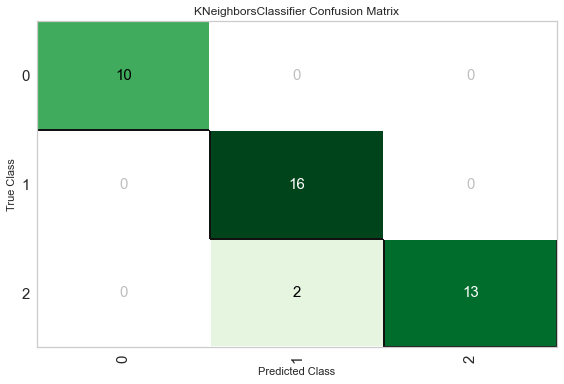

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [34]:
plot_model(knn, plot = 'confusion_matrix')

##### 1.2 Classification Report

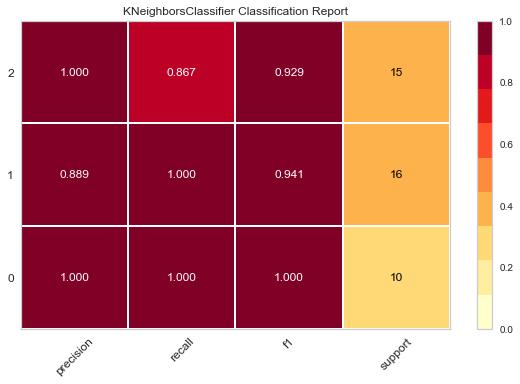

In [117]:
plot_model(knn, plot = 'class_report')

##### 1.3 Decision Boundary Plot

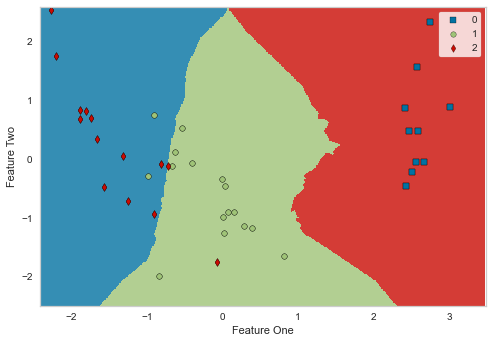

In [118]:
plot_model(knn, plot='boundary')

##### 1.4 Prediction Error Plot

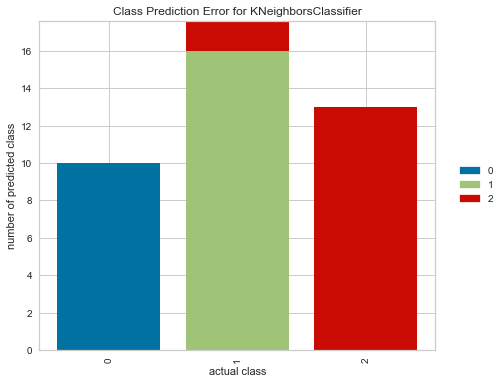

In [119]:
plot_model(knn, plot = 'error')

#### 2. Predict on test Sample

In [124]:
predict_model(knn);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0.9512,0.9990,0.9556,0.9566,0.9509,0.9253,0.9287


#### 3. Finalize Model for Deployment

In [125]:
final_knn = finalize_model(knn)

In [128]:
predict_model(final_knn);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0.9756,0.9981,0.9778,0.9770,0.9756,0.9627,0.9636


#### 4. Predict on unseen data

In [126]:
unseen_predictions = predict_model(final_knn, data=data_unseen2)
unseen_predictions.head()

,sepal_length,sepal_width,petal_length,petal_width,species,Label,Score
0,5.4,3.9,1.7,0.4,Iris-setosa,Iris-setosa,1.0
1,5.4,3.4,1.7,0.2,Iris-setosa,Iris-setosa,1.0
2,5.1,3.3,1.7,0.5,Iris-setosa,Iris-setosa,1.0
3,4.8,3.1,1.6,0.2,Iris-setosa,Iris-setosa,1.0
4,6.9,3.1,4.9,1.5,Iris-versicolor,Iris-versicolor,1.0


### Logistic Regression

In [111]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9000,1.0000,0.8889,0.9250,0.8971,0.8485,0.8616
2,0.9000,1.0000,0.8889,0.9250,0.8971,0.8485,0.8616
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.8889,0.9630,0.8889,0.9167,0.8857,0.8333,0.8492
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
9,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [112]:
tuned_lr = tune_model(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.8000,0.9786,0.7778,0.8800,0.7750,0.6970,0.7435
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.8889,0.9537,0.8889,0.9167,0.8857,0.8333,0.8492
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
9,0.8889,0.9167,0.8333,0.9167,0.8783,0.8235,0.8407


#### 1. Plot

##### 1.1 Confusion Matrix

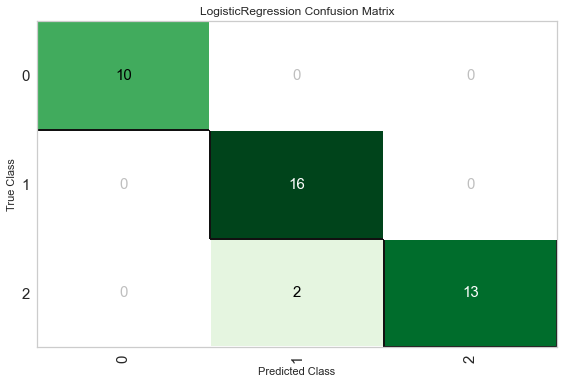

In [120]:
plot_model(lr, plot = 'confusion_matrix')

##### 1.2 Classification Report

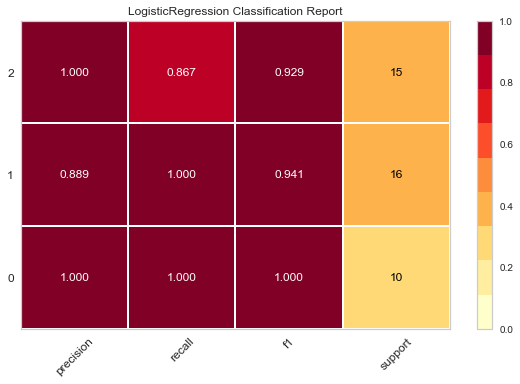

In [121]:
plot_model(lr, plot = 'class_report')

##### 1.3 Decision Boundary Plot

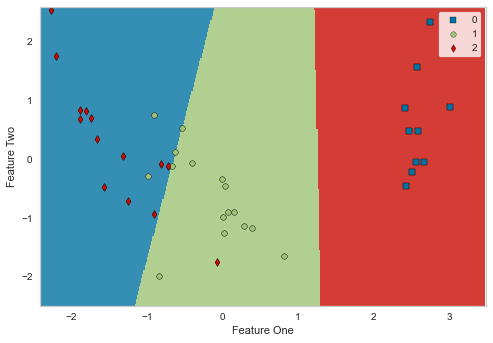

In [122]:
plot_model(lr, plot='boundary')

##### 1.4 Prediction Error Plot

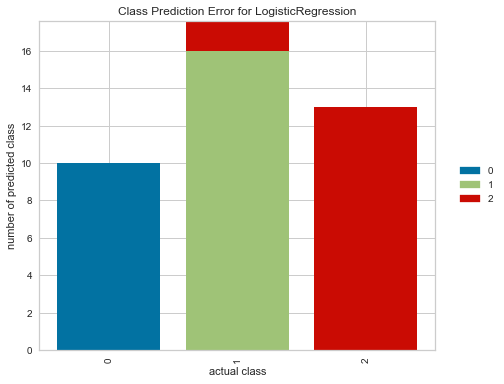

In [123]:
plot_model(lr, plot = 'error')

#### 2. Predict on test Sample

In [127]:
predict_model(lr);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.9512,0.9933,0.9556,0.9566,0.9509,0.9253,0.9287


#### 3. Finalize Model for Deployment

In [129]:
final_lr = finalize_model(lr)

In [130]:
predict_model(final_lr);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.9756,1.0000,0.9778,0.9770,0.9756,0.9627,0.9636


#### 4. Predict on unseen data

In [131]:
unseen_predictions = predict_model(final_lr, data=data_unseen2)
unseen_predictions.head()

,sepal_length,sepal_width,petal_length,petal_width,species,Label,Score
0,5.4,3.9,1.7,0.4,Iris-setosa,Iris-setosa,0.9666
1,5.4,3.4,1.7,0.2,Iris-setosa,Iris-setosa,0.9428
2,5.1,3.3,1.7,0.5,Iris-setosa,Iris-setosa,0.9483
3,4.8,3.1,1.6,0.2,Iris-setosa,Iris-setosa,0.9608
4,6.9,3.1,4.9,1.5,Iris-versicolor,Iris-versicolor,0.6906
